In [36]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import max_error
import seaborn as sns

In [2]:
path = os.getcwd()
folder= path + "/dataset/series_boyas/analisis/"
print(folder)

/home/jorge/tsunami-warning/dataset/series_boyas/analisis/


In [3]:
df = pd.read_json(folder+'DataFrame_boyas.json') # cargar dataframe

In [4]:
df.head()

,boyas28_E4_7.5,boyas0_E4_7.5,boyas18_E4_7.5,inu_valpo6_E4_7.5,inu_valpo9_E4_7.5,inu_vina20_E4_7.5,inu_vina24_E4_7.5,inu_vina25_E4_7.5,boyas28_E3_8.5,boyas0_E3_8.5,...,inu_vina24_E3_9.0,inu_vina25_E3_9.0,boyas28_E3_9.5,boyas0_E3_9.5,boyas18_E3_9.5,inu_valpo6_E3_9.5,inu_valpo9_E3_9.5,inu_vina20_E3_9.5,inu_vina24_E3_9.5,inu_vina25_E3_9.5
0,0.000000e+00,0.000000e+00,0.000000e+00,0,0,0,0,0,0.000000e+00,0.000000e+00,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,-4.310000e-08,-2.600000e-09,-1.090000e-08,0,0,0,0,0,-4.187000e-07,-1.502000e-07,...,0.0,0.0,-0.000006,-0.000010,-0.000028,0.0,0.0,0.0,0.0,0.0
2,-6.700000e-08,-1.610000e-08,-3.200000e-08,0,0,0,0,0,-9.453000e-07,-3.998000e-07,...,0.0,0.0,-0.000015,-0.000029,-0.000064,0.0,0.0,0.0,0.0,0.0
3,-9.180000e-08,-3.630000e-08,-5.850000e-08,0,0,0,0,0,-1.603300e-06,-7.378000e-07,...,0.0,0.0,-0.000028,-0.000057,-0.000110,0.0,0.0,0.0,0.0,0.0
4,-1.690000e-07,-8.370000e-08,-1.253000e-07,0,0,0,0,0,-3.003700e-06,-1.570800e-06,...,0.0,0.0,-0.000071,-0.000138,-0.000223,0.0,0.0,0.0,0.0,0.0


Text(0, 0.5, 'Altura de ola [m]')

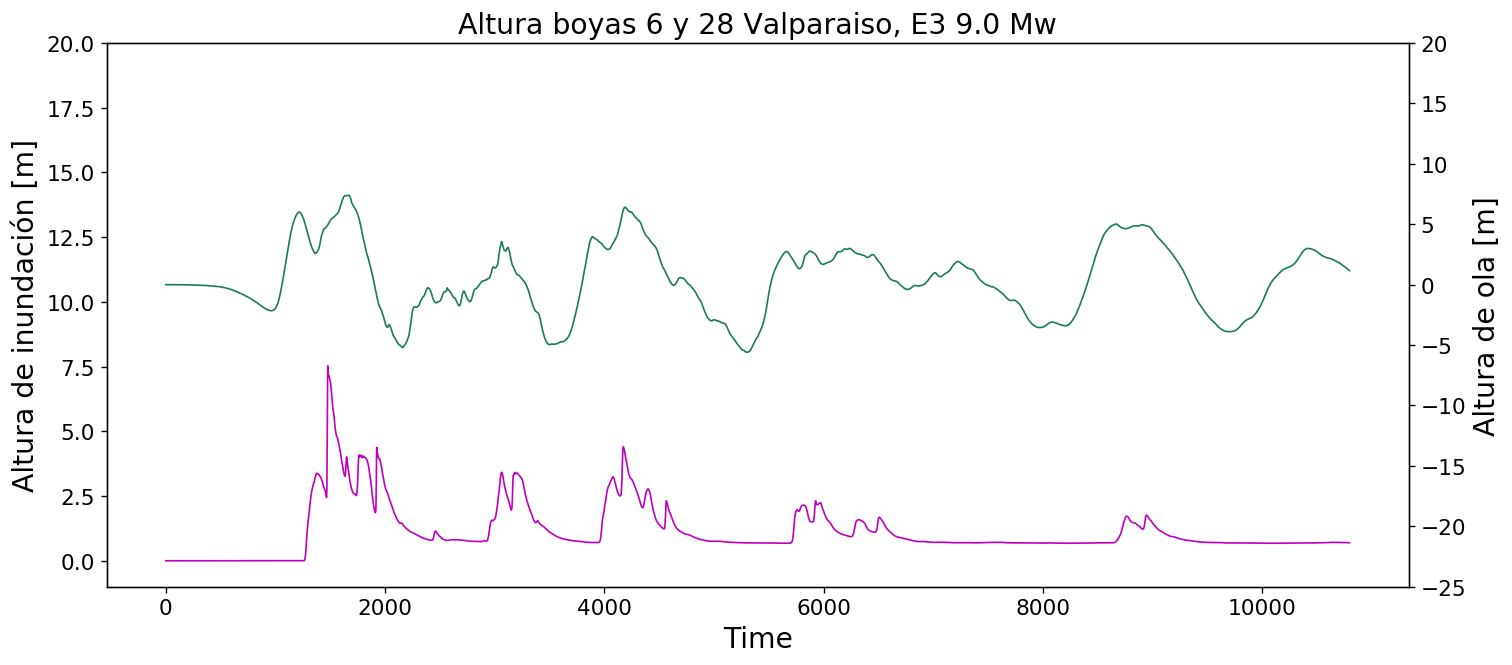

In [25]:
plt.figure(figsize=(14,6), dpi=120)

plt.ion()
plt.rc('xtick', labelsize=13) 
plt.rc('ytick', labelsize=13)
plt.title('Altura boyas 6 y 28 Valparaiso, E3 9.0 Mw',fontsize=17)
plt.xlabel('Time',fontsize=17)
plt.ylabel('Altura de inundación [m]',fontsize=17)
plt.plot(df['inu_valpo6_E3_9.0'], color='m', linewidth=1.0)
plt.ylim(-1,20)
plt.twinx()
plt.plot(df['boyas28_E3_9.0'], color='#1C7C54', linewidth=1.0)
plt.ylim(-25,20)
ax = plt.gca()
#ax.invert_yaxis()
plt.ylabel('Altura de ola [m]',fontsize=17)


Text(0, 0.5, 'Altura de ola [m]')

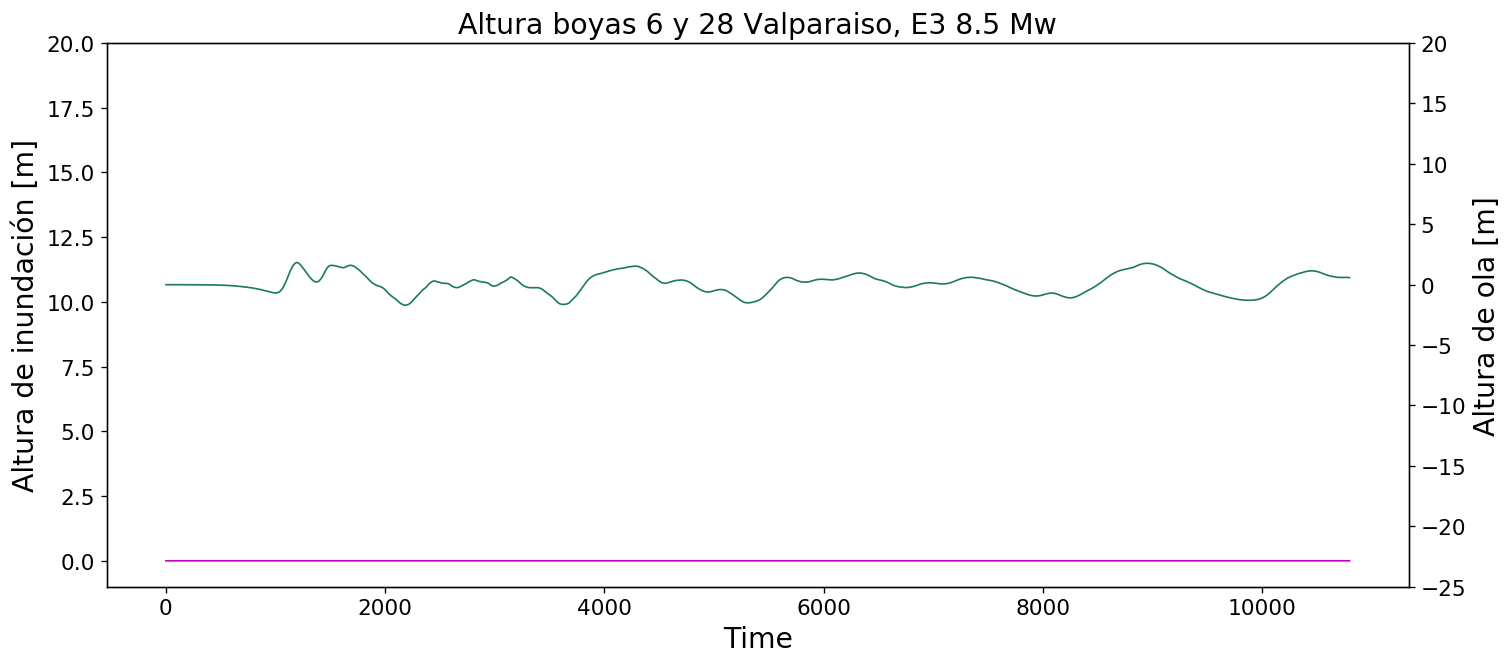

In [35]:
plt.figure(figsize=(14,6), dpi=120)
plt.ion()
plt.rc('xtick', labelsize=13) 
plt.rc('ytick', labelsize=13)
plt.title('Altura boyas 6 y 28 Valparaiso, E3 8.5 Mw',fontsize=17)
plt.xlabel('Time',fontsize=17)
plt.ylabel('Altura de inundación [m]',fontsize=17)
plt.plot(df['inu_valpo6_E3_8.5'], color='m', linewidth=1.0)
plt.ylim(-1,20)
plt.twinx()
plt.plot(df['boyas28_E3_8.5'], color='#1C7C54', linewidth=1.0)
plt.ylim(-25,20)
ax = plt.gca()
#ax.invert_yaxis()
plt.ylabel('Altura de ola [m]',fontsize=17)

In [7]:
boya90 = df['boyas28_E3_9.0']
inu90 =  df['inu_valpo6_E3_9.0']

boya85 = df['boyas28_E3_8.5']
inu85 =  df['inu_valpo6_E3_8.5']
# load the dataset
boya90 = boya90.values
boya90 = boya90.astype('float32')

boya85 = boya85.values
boya85 = boya85.astype('float32')

inu90 = inu90.values
inu90 = inu90.astype('float32')

inu85 = inu85.values
inu85 = inu85.astype('float32')

### Normaliza data (aún no estamos normalizando).

In [8]:
"""
scaler_boya = MinMaxScaler(feature_range=(-1, 1))
scaler_inu = MinMaxScaler(feature_range=(-1, 1))

boya_nor90 = scaler_boya.fit_transform(boya90.reshape(-1,1))
inu_nor90 = scaler_inu.fit_transform(inu90.reshape(-1,1))

boya_nor85 = scaler_boya.fit_transform(boya85.reshape(-1,1))
inu_nor85 = scaler_inu.fit_transform(inu85.reshape(-1,1))
"""

'\nscaler_boya = MinMaxScaler(feature_range=(-1, 1))\nscaler_inu = MinMaxScaler(feature_range=(-1, 1))\n\nboya_nor90 = scaler_boya.fit_transform(boya90.reshape(-1,1))\ninu_nor90 = scaler_inu.fit_transform(inu90.reshape(-1,1))\n\nboya_nor85 = scaler_boya.fit_transform(boya85.reshape(-1,1))\ninu_nor85 = scaler_inu.fit_transform(inu85.reshape(-1,1))\n'

In [9]:
dataset_tr= np.column_stack((boya90,inu90))

dataset_te= np.column_stack((boya85,inu85))


In [10]:
df_nor = pd.DataFrame(dataset_tr,columns = ['boyas28_E3_9.0','inu_valpo6_E3_9.0'])                           

In [11]:
df_nor.tail(10)

,boyas28_E3_9.0,inu_valpo6_E3_9.0
10790,1.226845,0.698544
10791,1.215798,0.698438
10792,1.210616,0.698385
10793,1.204904,0.698331
10794,1.198735,0.698278
10795,1.187051,0.698172
10796,1.181822,0.698119
10797,1.176628,0.698068
10798,1.165696,0.697967
10799,1.160170,0.697917


In [12]:
train = dataset_tr
test = dataset_te

In [13]:
# genera secuencias de entrada y salida

def split_sequence(sequence, look_backward, look_forward):
    X, y = list(), list()
    for time in range(look_backward,len(sequence)):
        # se suma uno porque no considera el ultimo
        seq_x, seq_y = list(sequence[:,0][time-look_backward:time+1]), sequence[:,1][time]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)


In [14]:
look_backward = 180 # numero de pasos hacia atras de tiempo a considerar 
look_forward = 0 # pasos hacia adelante a predecir

trainX,trainY = split_sequence(train, look_backward, look_forward)
testX,testY = split_sequence(test, look_backward, look_forward)

In [15]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [16]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import TimeSeriesSplit
from keras.callbacks import History 
from keras.layers import Dropout
from keras.optimizers import Adam
Xm = trainX
ym = trainY
tscv = TimeSeriesSplit(n_splits=10)
hist = History()
epoch = 50
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(1,look_backward+1)))
model.add(LSTM(40, activation='relu', return_sequences=True))
#model.add(Dropout(0.1))
model.add(LSTM(30, activation='relu', return_sequences=True))
model.add(LSTM(20, activation='relu', return_sequences=True))
#model.add(Dropout(0.1))
model.add(LSTM(10, activation='relu'))
model.add(Dense(1))
model.compile(optimizer=Adam(lr=0.0006), loss='mse')    
for train, test in tscv.split(Xm):
    history = model.fit(Xm[train], ym[train],validation_data=(Xm[test], ym[test]), epochs=epoch, verbose=0
                        ,callbacks=[hist])
    

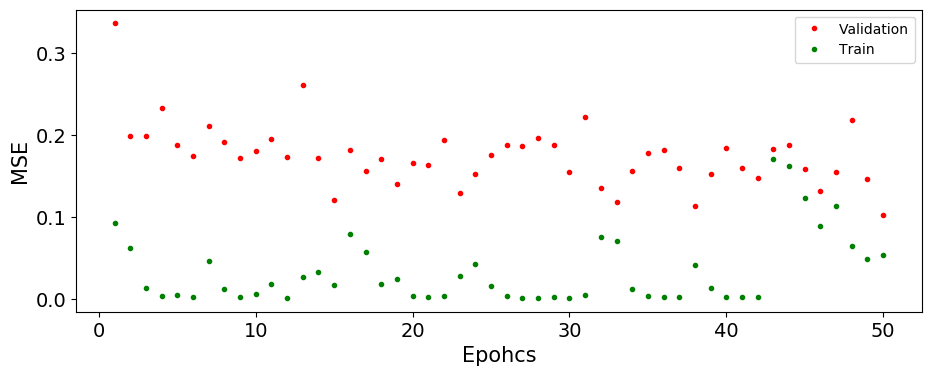

In [17]:
import matplotlib.pyplot as plt
a=np.linspace(1,epoch,epoch)
plt.figure(figsize=(24,4), dpi=100)
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 
plt.subplot(1,2,1)
plt.plot(a,hist.history['val_loss'],'r.',label = 'Validation')
plt.plot(a,hist.history['loss'],'g.',label = 'Train')
plt.xlabel('Epohcs',fontsize=15)
plt.ylabel('MSE',fontsize=15)
plt.legend(loc='upper right')

In [18]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [19]:
# invert predictions
"""
trainPredict = scaler_inu.inverse_transform(trainPredict.reshape(-1,1))
trainY = scaler_inu.inverse_transform(trainY.reshape(-1,1))
testPredict = scaler_inu.inverse_transform(testPredict.reshape(-1,1))
testY = scaler_inu.inverse_transform(testY.reshape(-1,1))
"""

'\ntrainPredict = scaler_inu.inverse_transform(trainPredict.reshape(-1,1))\ntrainY = scaler_inu.inverse_transform(trainY.reshape(-1,1))\ntestPredict = scaler_inu.inverse_transform(testPredict.reshape(-1,1))\ntestY = scaler_inu.inverse_transform(testY.reshape(-1,1))\n'

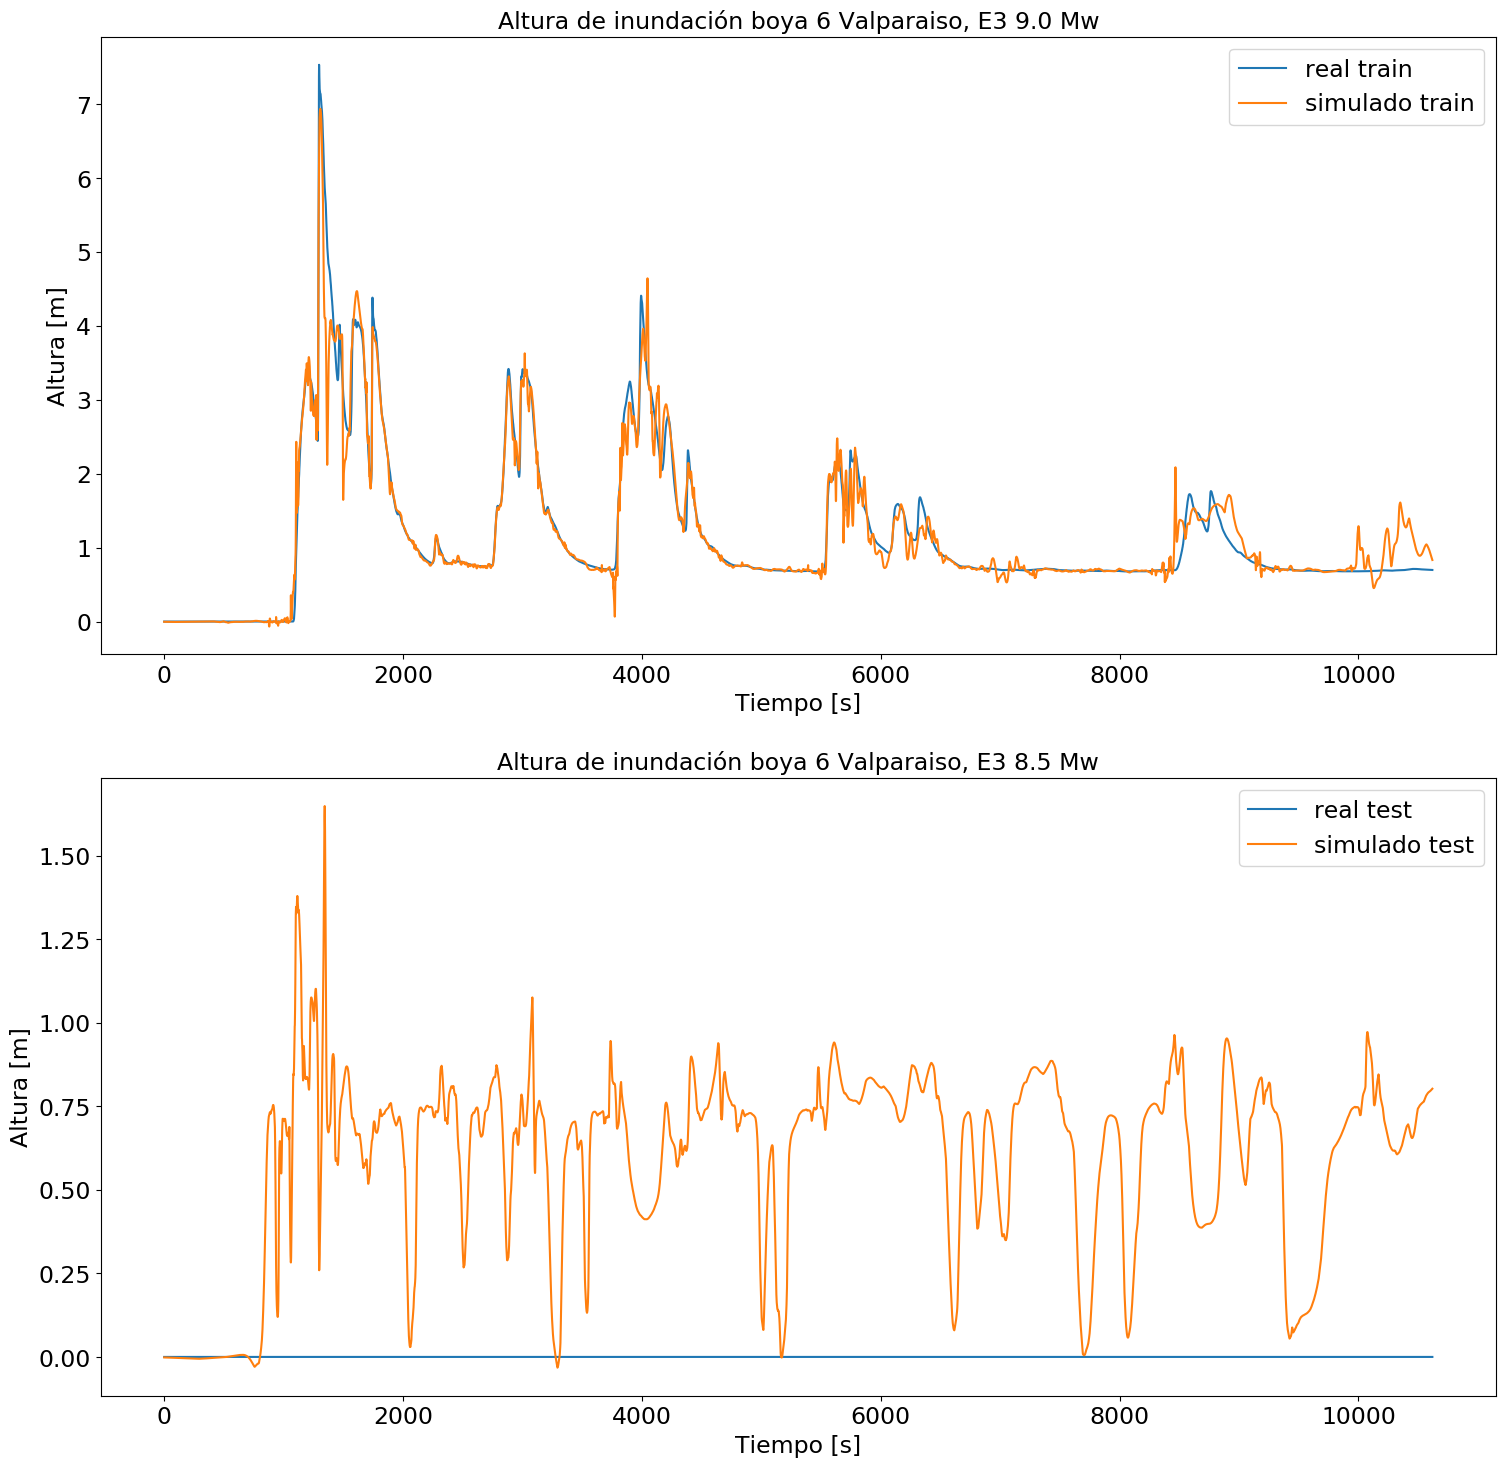

In [34]:
plt.figure(figsize=(18,18), dpi=100)

plt.subplot(2,1,1)
plt.plot(trainY,label = 'real train')
plt.plot(trainPredict, label = 'simulado train')
plt.rc('xtick', labelsize=17) 
plt.rc('ytick', labelsize=17)
plt.title('Altura de inundación boya 6 Valparaiso, E3 9.0 Mw',fontsize=17)
plt.ylabel('Altura [m]',fontsize=17)
plt.xlabel('Tiempo [s]',fontsize=17)
plt.legend(loc='upper right',fontsize=17)

plt.subplot(2,1,2)
plt.plot(testY,label = 'real test')
plt.plot(testPredict, label = 'simulado test')
plt.rc('xtick', labelsize=17) 
plt.rc('ytick', labelsize=17)
plt.title('Altura de inundación boya 6 Valparaiso, E3 8.5 Mw',fontsize=17)
plt.ylabel('Altura [m]',fontsize=17)
plt.xlabel('Tiempo [s]',fontsize=17)
plt.legend(loc='upper right',fontsize=17)